<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

___________________________________
___________________________________

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy.stats import variation, zscore, kstest, norm

In [4]:
sns.__version__

'0.9.0'

In [50]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [5]:
dataset = pd.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [6]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [7]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [59]:
w_dataset = dataset[important_cols]
w_dataset.head()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0


___________________________________
___________________________________

## 1. Estadísticos descriptivos  

### 1.1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [9]:
## Remuevo las columnas que sean categoricas nominales.
nonordinals_cols_to_remove = ['ISO_code', 'countries', 'region']
w_dataset_range = w_dataset.drop(columns = nonordinals_cols_to_remove)

**Rangos:**

In [11]:
## Calculo el rango para cada columna.
pd.DataFrame([w_dataset_range.min(), w_dataset_range.max(), w_dataset_range.max() - w_dataset_range.min()], 
                     index=['min','max','rango']).transpose()

,min,max,rango
year,2008.000000,2016.000000,8.000000
pf_identity_legal,0.000000,10.000000,10.000000
pf_identity_parental_marriage,0.000000,10.000000,10.000000
pf_identity_parental_divorce,0.000000,10.000000,10.000000
pf_identity_parental,0.000000,10.000000,10.000000
pf_identity_sex_male,0.000000,10.000000,10.000000
pf_identity_sex_female,0.000000,10.000000,10.000000
pf_identity_sex,0.000000,10.000000,10.000000
pf_identity_divorce,0.000000,10.000000,10.000000
pf_identity,0.000000,10.000000,10.000000


**Interpretacion:**

De la tabla enterior, podemos observar que:

- Se obtuvieron las variables para cada pais a lo largo de 8 años, una vez por año, desde el 2010 al 2018. 

- Se ha usado una scala de puntajes del 0 al 10 (0 es menos libre y 10 el mas libre) para medir las diferentes variables relacionadas a las libertades personales (*pf_identity*) para luego obtener un puntaje final (*hf_score*) y por ultimo un ranking (*hf_rank*) de libertad personal entre los 162 paises. 

- Con respecto a las variables de libertad economica se observan dos, el puntaje de libertad economica (*ef_score*) cuyos valores son puntajes del 0 al 10 y el ranking de libertad economica entre los 162 paises.

- Por ultimo, con respecto a los puntajes finales de libertad se observa que el pais con menor libertad personal es 5.36 puntos menos libre que el de mayor libertad personal y el pais con menor libertad economica es 6.31 puntos menos libre que el pais con mayo libertad economica.

### 1.2. Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 

In [13]:
w_dataset.loc[w_dataset['region'] == 'Latin America & the Caribbean', 'grupo'] = 'Latin America & the Caribbean'
w_dataset.loc[w_dataset['region'] != 'Latin America & the Caribbean', 'grupo'] = 'Others'
## Remuevo valores NaN
w_dataset_cleaned = w_dataset[['year', 'countries', 'grupo', 'pf_identity', 'hf_score']].dropna()

In [14]:
## Una pequeña descripcion para saber con que valores estoy tratando
w_dataset_cleaned.describe()

,year,pf_identity,hf_score
count,1378.000000,1378.000000,1378.000000
mean,2012.111756,7.334180,6.993444
std,2.569130,3.159473,1.025811
min,2008.000000,0.000000,3.765827
25%,2010.000000,5.000000,6.336685
50%,2012.000000,9.166667,6.923840
75%,2014.000000,10.000000,7.894660
max,2016.000000,10.000000,9.126313


In [15]:
## Filtro LAtam
latam_cleaned = w_dataset_cleaned[w_dataset_cleaned['grupo'] == 'Latin America & the Caribbean']
## Una pequeña descripcion para saber con que valores estoy tratando
latam_cleaned.describe()

,year,pf_identity,hf_score
count,232.000000,232.000000,232.000000
mean,2012.030172,8.765086,7.047982
std,2.577617,1.711732,0.608904
min,2008.000000,5.000000,4.200724
25%,2010.000000,7.500000,6.779311
50%,2012.000000,10.000000,7.028045
75%,2014.000000,10.000000,7.339903
max,2016.000000,10.000000,8.290152


In [16]:
## Filtro Resto del Mundo
others_cleaned = w_dataset_cleaned[w_dataset_cleaned['grupo'] == 'Others']
## Una pequeña descripcion para saber con que valores estoy tratando
others_cleaned.describe()

,year,pf_identity,hf_score
count,1146.000000,1146.000000,1146.000000
mean,2012.128272,7.044503,6.982403
std,2.568221,3.303771,1.090861
min,2008.000000,0.000000,3.765827
25%,2010.000000,5.000000,6.204917
50%,2012.000000,8.333333,6.867191
75%,2014.000000,10.000000,8.023044
max,2016.000000,10.000000,9.126313


**Descripcion estadística de Latinoamérica y el Caribe:**

In [17]:
## Medidas descriptivas de LA y Caribe.
raw = {'pf_identity': [latam_cleaned.pf_identity.median(), latam_cleaned.pf_identity.mean(), latam_cleaned.pf_identity.std()],
       'hf_score': [latam_cleaned.hf_score.median(), latam_cleaned.hf_score.mean(), latam_cleaned.hf_score.std()]}
pd.DataFrame(raw, index=['mediana','media','desviacion'])

,pf_identity,hf_score
mediana,10.000000,7.028045
media,8.765086,7.047982
desviacion,1.711732,0.608904


**Descripcion estadística Global:**

In [19]:
## Medidas descriptivas del resto del mundo.
raw = {'pf_identity': [others_cleaned.pf_identity.median(), others_cleaned.pf_identity.mean(), others_cleaned.pf_identity.std()],
       'hf_score': [others_cleaned.hf_score.median(), others_cleaned.hf_score.mean(), others_cleaned.hf_score.std()]}
pd.DataFrame(raw, index=['mediana','media','desviacion'])

,pf_identity,hf_score
mediana,8.333333,6.867191
media,7.044503,6.982403
desviacion,3.303771,1.090861


Medias distintas, usamos el coeficiente de variacion para comparar cual de los grupos tiene mayor dispersion:

In [21]:
coefvar_latam = variation(latam_cleaned[["pf_identity", "hf_score"]])
coefvar_ohters = variation(others_cleaned[["pf_identity", "hf_score"]])
pd.DataFrame({'pf_identity': [coefvar_latam[0], coefvar_ohters[0]], 
                  'hf_score': [coefvar_latam[1], coefvar_ohters[1]]},
                index=['Latam y Caribe','Resto del Mundo'])

,pf_identity,hf_score
Latam y Caribe,0.194868,0.086208
Resto del Mundo,0.468781,0.156162


**¿Vale la pena calcular la moda?**

In [24]:
## pf_identity
## Cuantas modas hay
pf_identity_mode_count = latam_cleaned.pf_identity.mode().count()

## Valor de la moda o modas.
pf_identity_mode = latam_cleaned.pf_identity.mode()

## Frecuencias de pf_identity.
pf_identity_frec = pd.value_counts(latam_cleaned.pf_identity).to_frame().reset_index()
pf_identity_frec.columns = ['pf_identity','frecuencia']

## hf_score
## Cuantas modas hay
hf_score_mode_count = latam_cleaned.hf_score.mode().count()

## Valor de la moda o modas.
hf_score_mode = latam_cleaned.hf_score.mode()

## Frecuencias de hf_score.
hf_score_frec = pd.value_counts(latam_cleaned.hf_score).to_frame().reset_index()
hf_score_frec.columns = ['hf_score','frecuencia']

## Armo cuadro con resutados.
raw = {
    'mode_count': [pf_identity_mode_count, hf_score_mode_count],
    'mode': [pf_identity_mode[0] if pf_identity_mode_count == 1 else None, hf_score_mode[0] if hf_score_mode_count == 1 else None ]
}
pd.DataFrame(raw, index=['pf_identity','hf_score'])

,mode_count,mode
pf_identity,1,10.0
hf_score,232,NaN


**1.2 Interpretación:**

- Libertades de Identidad (*pf_indentity*)

    Si observamos la media para ambos grupos vemos que difieren. Los coeficientes de variacion indican que las observaciones en el grupo Resto del Mundo presentan mayor dispersion con respecto a la media que el grupo de Latam y Caribe.

    Si observamos la mediana en Latam y Caribe el valor central observado es de 10 y en el Resto del Mundo es de 8.33.


- Libetades humanas (*hf_score*)

    Si observamos la media para ambos grupos vemos que difieren, segun la media el grupo Resto del Mundo. Los coeficientes de variacion indican que las observaciones en el grupo Resto del Mundo presentan mayor dispersion.

    Si observamos la mediana en Latam y Caribe el valor central observado es de 7.02 y en el Resto del Mundo es de 6.87. Podemos decir que, segun la mediana, en el grupo Latam y Caribe se tiene menor puntaje en libertades humanas. En Resto del Mundo pdoria haber observaciones en algunos paises con valor muy bajos con respecto al valor central.


- **¿Tiene sentido entonces calcular la moda?**

    *pf_identity* tiene una sola moda con valor de 10.0, mismo valor que la mediana. Para esta variable el valor central y el de mayor frecuencia es el 10.0, la media es de 8.77 con desviacion de 1.71. No nos queda claro en este caso que descriptor es mas representativo.

    *hf_score* tiene 232 modas, ningun valor se repita mas de una vez. En este caso la moda no nos dice nada y se puede optar por la media o mediana como metricas mas descriptivas.

### 1.3 ¿Son todos los valores de pf_identity y hf_score directamente comparables? ¿Qué otra variable podría influenciarlos?

El año puede influenciar en valores de las variables. Peude ser que de un año a otro las condiciones sociales y politcas hayan tenido un brusco cambio. Generalmente estos cambios son para peor y no para mejor.

### 1.4 ¿Cómo pueden sanearse los valores faltantes?

Lo datos faltantes pueden sanearse asignandoles el valor de la medida descriptiva mas conveniente para cada variable o un valor constante si tiene algun significado segun el estudio a realizar.

Se pueden sanear teniendo la medida desciptiva por año por pais si la hubiera. Evitando usar una medida descriptiva global o regional sin considerar el año. El problema que tenemos es que la situacion de un pais puede variar mucho en cuanto a libertades de un año a otro en relación a sus vecinos.

### 1.5 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Decidimos tomar varios enfoques para resolver este problema:
- Usando "x" veces la distancia a la media
- Usando Boxplots

In [31]:
## Outliers por grupo usando x veces la distancia a la media.

w_dataset_cleaned['pf_identity_zscore'] = zscore(w_dataset_cleaned["pf_identity"])
w_dataset_cleaned['hf_score_zscore'] = zscore(w_dataset_cleaned["hf_score"])

pf_identity_zscore_outliers = w_dataset_cleaned["pf_identity_zscore"].apply(
    ## Si zscore es menor 2.5 o mayor a 2.5, el valor observado esta en el 5% mas chico o mas grande.
  lambda x: x <= -2.5 or x >= 2.5
)
hf_score_zscore_outliers = w_dataset_cleaned["hf_score_zscore"].apply(
    ## Si zscore es menor 2.5 o mayor a 2.5, el valor observado esta en el 5% mas chico o mas grande.
  lambda x: x <= -2.5 or x >= 2.5
)


**Outliers de *pf_identity* a nivel Global usando "x" veces la distancia la media:**

In [28]:
w_dataset_cleaned[pf_identity_zscore_outliers][["year","countries","grupo","pf_identity"]]

,year,countries,grupo,pf_identity


**Outliers de *hf_score* a nivel Global usando "x" veces la distancia la media:**

In [30]:
w_dataset_cleaned[hf_score_zscore_outliers][["year","countries","grupo","hf_score"]]

,year,countries,grupo,hf_score
69,2016,Iraq,Others,4.258014
86,2016,Libya,Others,4.310283
141,2016,Syria,Others,3.765827
157,2016,Venezuela,Latin America & the Caribbean,4.200724
159,2016,"Yemen, Rep.",Others,4.253278
303,2015,Syria,Others,3.910826
319,2015,Venezuela,Latin America & the Caribbean,4.241750
321,2015,"Yemen, Rep.",Others,4.203442
465,2014,Syria,Others,4.023595
627,2013,Syria,Others,4.095028


**Outliers de *pf_identity* a nivel Global usando boxplot:**

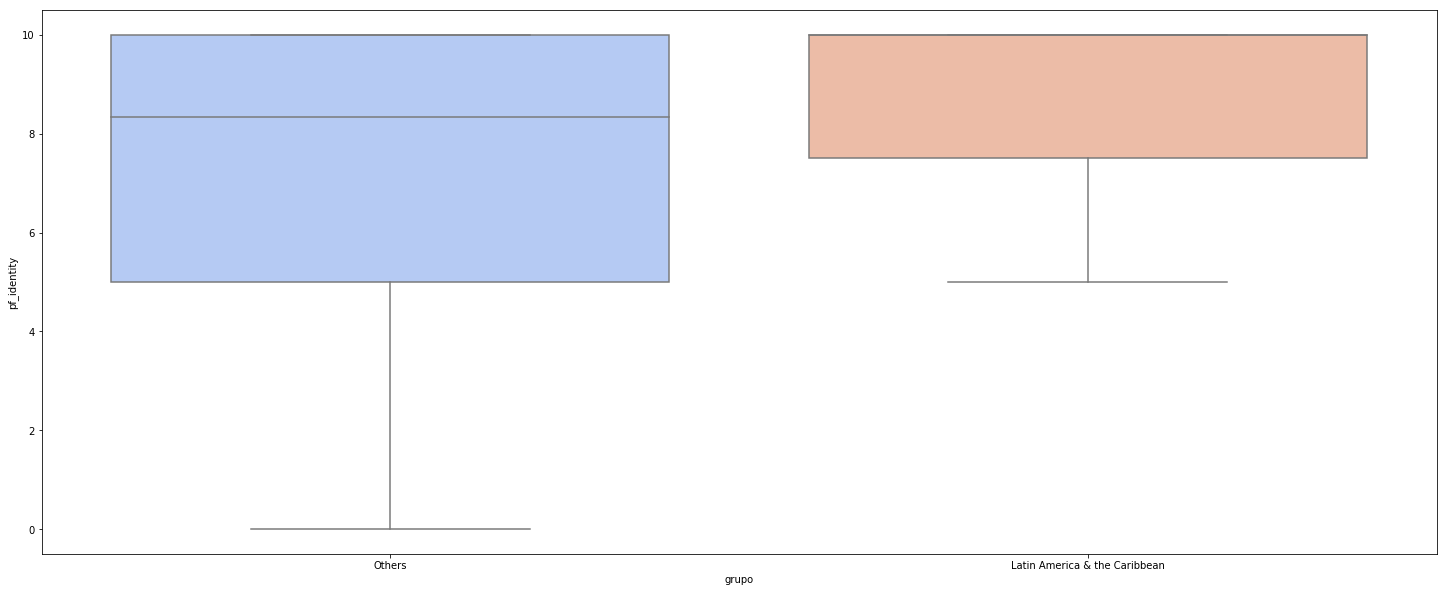

In [33]:
## Box plot para pf_identity
plt.figure(figsize=(25,10))
sns.boxplot(x="grupo", y="pf_identity", data=w_dataset_cleaned, palette="coolwarm")

**Outliers de *hf_score* a nivel Global usando boxplot:**

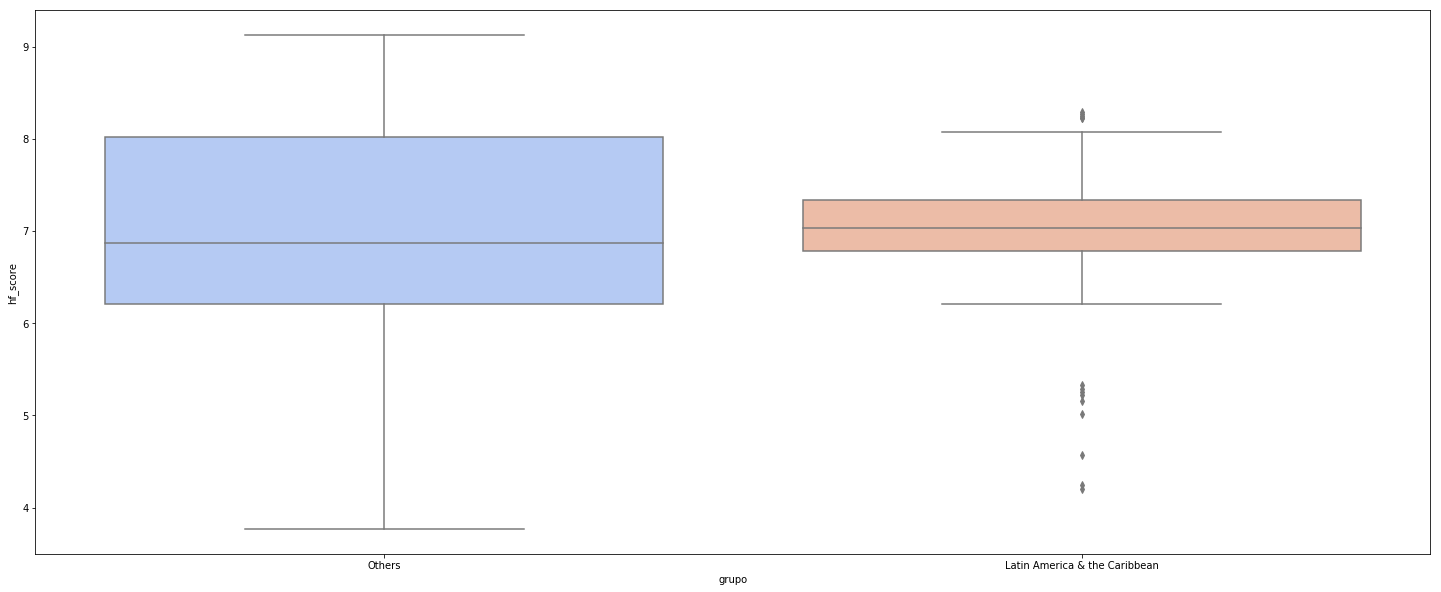

In [35]:
## Box plot para hf_score
plt.figure(figsize=(25,10))
sns.boxplot(x="grupo", y="hf_score", data=w_dataset_cleaned, palette="coolwarm")

In [ ]:
## TODO: calcular el IRQ para saber que filas son las outliers. (Q1 - (1.5 * IQR )) y (Q2 + (1.5 * IQR ))

**1.5 Interpretacion:**

- Outliers de grupo LA y Caribe y Resto del Mundo segun zscore
    - No se observan outliers para *pf_identity* en el grupo Latam y Caribe.
    - No se observan outliers para *pf_identity* en el grupo Resto del Mundo.

    - Se observan 2 outliers para *hf_score* en el grupo Latam y Caribe.
    - Se observa 8 outlier para *hf_score* en el grupo Resto del Mundo.


- Outliers de grupo LA y Caribe y Resto del Mundo segun boxplot
    - No se observan outliers para *pf_identity*.

    - Se observan outliers para *hf_score* para el grupo Latam y Caribe.
    - No se observan outliers para *hf_score* para el grupo Resto del Mundo.
 
 
- **¿Los eliminamos entonces o no?**

    Los eliminariamos para aproximarnos a una distribucion conocida. En las conclusiones los nombrariamos como casos especiales.

_________________________________________________
_________________________________________________

## 2. Agregación de datos

### 2.1 Grafiquen la media de la variable pf_identity y hf_score a través de los años.

In [37]:
data = w_dataset[['year','region','pf_identity','hf_score']]
datat = data.dropna()
data.groupby('year')['pf_identity'].apply(np.mean)

year
2008    7.517730
2009    7.517730
2010    7.303922
2011    7.467320
2012    7.467320
2013    7.364650
2014    7.387317
2015    7.062893
2016    6.976337
Name: pf_identity, dtype: float64

In [40]:
data.groupby('year')['hf_score'].apply(np.mean)

year
2008    7.069785
2009    7.075678
2010    7.036396
2011    7.031203
2012    6.985917
2013    6.983139
2014    6.958734
2015    6.932810
2016    6.889871
Name: hf_score, dtype: float64

**Media de *pf_identity* a través de los  años:**

Text(0, 0.5, 'pf_dentity mean')

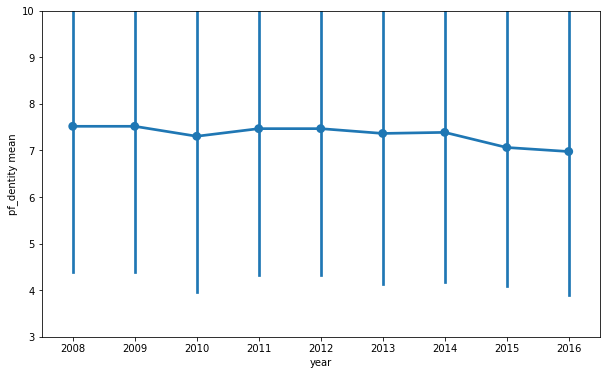

In [54]:
## pf_identity
plt.figure(figsize=(10,6))
sns.pointplot(data=data,
              x='year', y='pf_identity', 
              estimator=np.mean, 
              ci='sd')
plt.ylim(3, 10)
plt.ylabel('pf_dentity mean')

**Media de *hf_score* a través de los  años:**

Text(0, 0.5, 'hf_score mean')

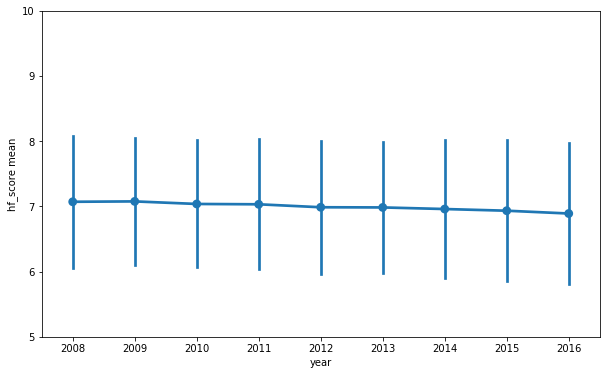

In [55]:
## hf_score
plt.figure(figsize=(10,6))
sns.pointplot(data=data,
              x='year', y='hf_score', 
              estimator=np.mean, 
              ci='sd')
plt.ylim(5, 10)
plt.ylabel('hf_score mean')

**2.1 Interpretación:**

Se observa una muy tenue tendencia a la baja en ambos valores a medida que pasan los años.

### 2.2 Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

**Media de *pf_identity* a través de los  años por regiones:**

Text(0, 0.5, 'pf_identity mean')

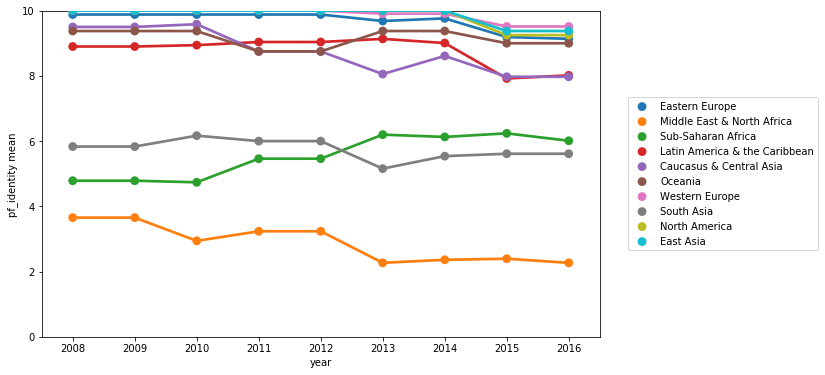

In [57]:
plt.figure(figsize=(10,6))
g = sns.pointplot(data=data,
                  x='year', y='pf_identity', 
                  estimator=np.mean, 
                  hue='region',
                  ci=None)
g.legend(loc='center right', bbox_to_anchor=(1.40, 0.5), ncol=1)
plt.ylim(0, 10)
plt.ylabel('pf_identity mean')

**Media de *hf_score* a través de los  años por regiones:**

Text(0, 0.5, 'hf_score mean')

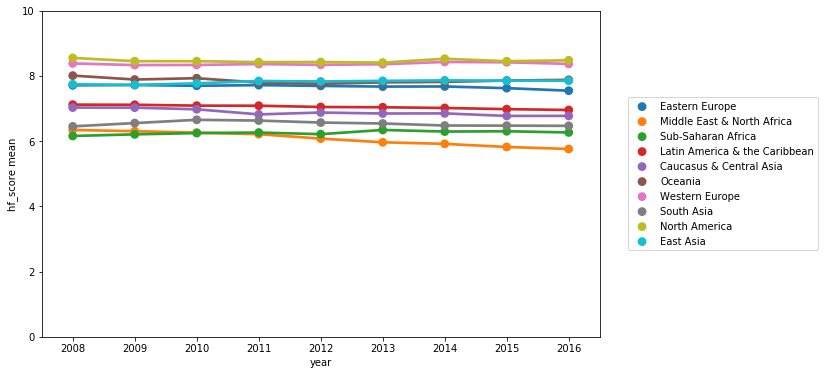

In [58]:
plt.figure(figsize=(10,6))
g = sns.pointplot(data=data,
                  x='year', y='hf_score', 
                  estimator=np.mean, 
                  hue='region',
                  ci=None)
g.legend(loc='center right', bbox_to_anchor=(1.40, 0.5), ncol=1)
plt.ylim(0, 10)
plt.ylabel('hf_score mean')

**2.2 Interpretación:**

Para la variable *pf_identity* no se puede disernir si se observa la misma tendencia entre el grafico a nivel mundial y el grafico por regiones, hay algunas regiones que suben, otras que bajan abruptamente y otras que bajan suavemente. Sin embargo para la variable *hf_score* si se puede observar tendencias similares entre los graficos.

_________________________________________________
_________________________________________________

## 3. Distribuciones

### 1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

In [60]:
## Filtro por pf_identity remuevo los valores NaN
pf_identity_cleaned = w_dataset['pf_identity'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
pf_identity_cleaned.describe()

count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64

In [61]:
## Filtro por hf_score remuevo los valores NaN
hf_score_cleaned = w_dataset['hf_score'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
hf_score_cleaned.describe()

count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64

In [62]:
## Filtro Latam por region Latinoamerica y Caribe
latam = w_dataset[w_dataset['region'] == 'Latin America & the Caribbean']
## Filtro por pf_identity y remuevo valores NaN
pf_identity_latam_cleaned = latam['pf_identity'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
pf_identity_latam_cleaned.describe()

count    232.000000
mean       8.765086
std        1.711732
min        5.000000
25%        7.500000
50%       10.000000
75%       10.000000
max       10.000000
Name: pf_identity, dtype: float64

In [63]:
## Filtro Latam por hf_score y remuevo valores NaN
hf_score_latam_cleaned = latam['hf_score'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
hf_score_latam_cleaned.describe()

count    232.000000
mean       7.047982
std        0.608904
min        4.200724
25%        6.779311
50%        7.028045
75%        7.339903
max        8.290152
Name: hf_score, dtype: float64

**Histograma de Distribucion de la variable *pf_identity:***

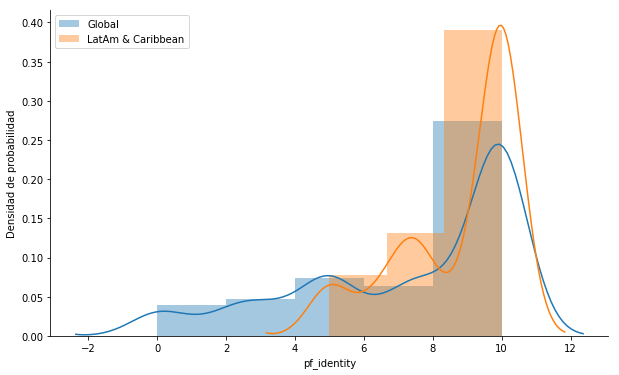

In [65]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "pf_identity" a nivel Global 
sns.distplot(pf_identity_cleaned, kde=True, bins=5, label='Global')

## Grafico la distribucion del puntaje "pf_identity" a nivel LatinoAmerica y Caribe 
sns.distplot(pf_identity_latam_cleaned, kde=True, bins=3, label='LatAm & Caribbean')
sns.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

**Histograma de Distribucion de la variable *hf_score*:**

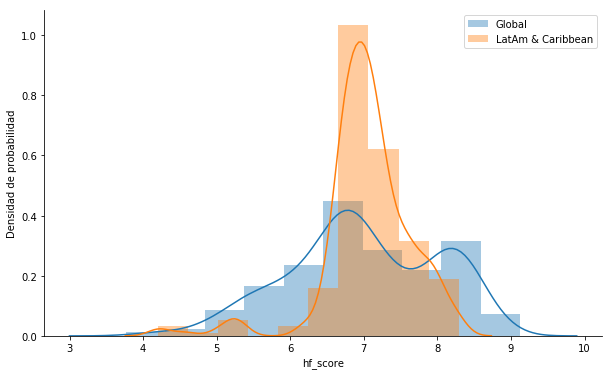

In [66]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "hf_score" a nivel Global 
sns.distplot(hf_score_cleaned, kde=True, bins=10, label='Global')

## Grafico la distribucion del puntaje "hf_score" a nivel LatinoAmerica y Caribe 
sns.distplot(hf_score_latam_cleaned, kde=True, bins=10, label='LatAm & Caribbean')
sns.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

**3.1. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?**

Parecería ser de distribucion Normal: muy sesgada en el caso de *pf_identity*. Mientras que en el caso de *hf_score*, la curva se asemeja más a una campana de Gauss "clásica". Lo que salta a la vista tras ver las los graficos es como si existiera una superposicion de 2 o más gaussianas, lo que insentiva a indagar un poco mas profundo en los registros. Se propone, entonces, presentar un par de nuevos graficos con los puntajes de cada pais de Latinoamerica y El Caribe y analizar así cuales de ellos son los responsables de "deformar" la curva normal clasica:

**Stripplot de la variable *pf_identity* para Latinoamérica y el Caribe:**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

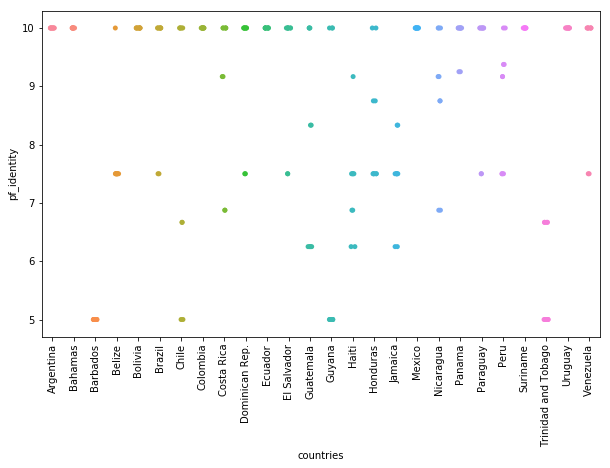

In [69]:
plt.figure(figsize=(10,6))
sns.stripplot(data=latam, x="countries", y="pf_identity", jitter=True)
plt.xticks(rotation=90)

**Interpretación:**

Podemos observar como los países se dividen en un grupo que poseen puntaje alto, otros puntaje medio, quedando Chile, Barbados, Guyana y Trinidad y Tobago como los de menor puntaje. Esto se corresponde con los 3 "picos" que vemos en el gráfico de distribución. No podriamos dejar pasar el analisis de este gráfico no sin antes comentar que resulta llamativo el hecho que Chile se encuentre tan alejado, en términos de *pf_identity*, de países como Uruguay y Argentina, que comparten estilos de vida similares.

**Boxplot de la variable *hf_score* para Latinoamérica y el Caribe:**

(0, 10)

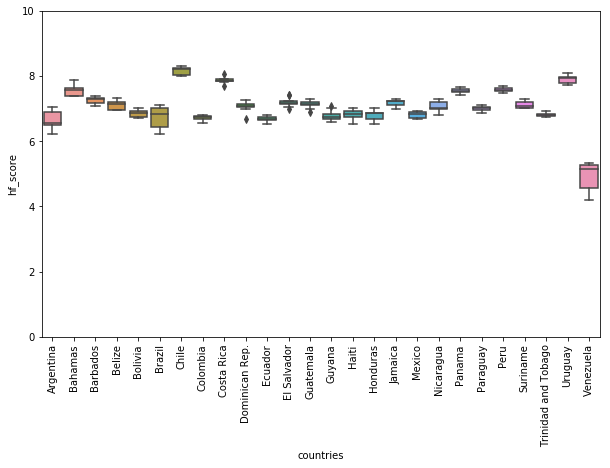

In [71]:
plt.figure(figsize=(10,6))
sns.boxplot(data=latam, x="countries", y="hf_score")
plt.xticks(rotation=90)
plt.ylim([0,10])

**Interpretación:**

En este caso, vemos como Venezuela esta claramente lejos del resto de los paises, correspondiendose con el "pico" mas bajo que vemos en el grafico de distribucion (la interpretacion que se le da esto es la dificil situacion socioeconomica que atraviesa el pais, especialmente desde el 2014).

Luego la gran mayoria de los paises se focalizan en valores medios-altos (el "pico" central) y vemos otra vez a Chile, esta vez acompañado por Uruguay, Costa Rica, Panama y Peru, como poseen valores ligeramente por encima de la media, haciendo referencia de esta forma al pequeño abultamiento que vemos en la cola del gráfico de distribucion. Con respecto a los valores que posee Chile y Uruguay podemos llegar a suponer que se debe a que atraviesan un buen pasar económico y social, sin embargo no hace falta ser un sociólogo o politólogo para saber que tal vez no es tan asi como lo muestran dichos valores; por lo que podemos suponer que no representan la realidad de forma demasiado acertada. El hecho que Costa Rica, Panamá y Perú acompañen a nuestros paises vecinos recien nombrados no hace mas que incrementar nuestras sospechas de que los valores de *hf_score* de nuestra muestras no son muy de fiar.

Dado estos resultados, y ratificando los deducido en los items 1 y 2 de este práctico, se decide entonces volver a presentar los gráficos de distribucion pero tomando las siguientes medidas:
- En el caso de Latinoamerica y el Caribe:
    - Se decide excluir a Venezuela, Chile, Costa Rica, Panama y Peru para los siguientes análisis sobre *hf_score*.
- En el caso del resto del mundo:
    - Se decide excluir a Iran, Siria, Libia, Yemen y Venezuela para los siguientes análisis sobre *hf_score*.

In [72]:
## Excluyo Venezuela, Chile, Costa Rica, Panama y Peru, filtro por hf_score y remuevo valores NaN
hf_score_latam_cleaned_wo_outliers = latam[latam.countries != "Venezuela"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers[hf_score_latam_cleaned_wo_outliers.countries != "Chile"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers[hf_score_latam_cleaned_wo_outliers.countries != "Costa Rica"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers[hf_score_latam_cleaned_wo_outliers.countries != "Panama"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers[hf_score_latam_cleaned_wo_outliers.countries != "Peru"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers['hf_score'].dropna()
hf_score_latam_cleaned_wo_outliers.describe()

count    187.000000
mean       7.009078
std        0.336987
min        6.207145
25%        6.768122
50%        6.995549
75%        7.177543
max        8.073788
Name: hf_score, dtype: float64

In [73]:
## Excluyo a Iran, Siria, Libia, Yemen y Venezuela, filtro por hf_score y remuevo valores NaN
hf_score_cleaned_wo_outliers = w_dataset[w_dataset.countries != "Iran"]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers[hf_score_cleaned_wo_outliers.countries != "Syria"]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers[hf_score_cleaned_wo_outliers.countries != "Libya"]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers[hf_score_cleaned_wo_outliers.countries != "Yemen, Rep."]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers[hf_score_cleaned_wo_outliers.countries != "Venezuela"]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers['hf_score'].dropna()
hf_score_cleaned_wo_outliers.describe()

count    1340.000000
mean        7.055563
std         0.966867
min         4.258014
25%         6.413465
50%         6.954874
75%         7.931989
max         9.126313
Name: hf_score, dtype: float64

**Histograma de Distribucion de la variable *hf_score* sin outliers:**

Tras analizar los datos, se vuelve a hacer el gráfico de distribución para *hf_score*, pero esta vez sin outliers:

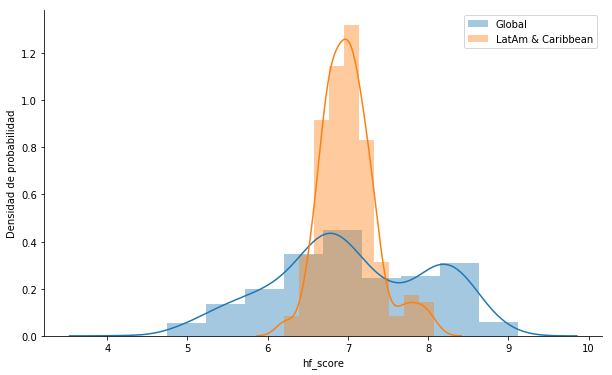

In [75]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "hf_score" a nivel Global 
sns.distplot(hf_score_cleaned_wo_outliers, kde=True, bins=10, label='Global')

## Grafico la distribucion del puntaje "hf_score" a nivel LatinoAmerica y Caribe 
sns.distplot(hf_score_latam_cleaned_wo_outliers, kde=True, bins=10, label='LatAm & Caribbean')
sns.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

### 2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [78]:
## Prueba de Kolmogorov-Smirnof para *pf_identity* (latam)
pf_identity_latam_cleaned_norm = zscore(pf_identity_latam_cleaned)
kstest(pf_identity_latam_cleaned_norm, 'norm')

KstestResult(statistic=0.3513672528496658, pvalue=4.08023938470139e-26)

In [79]:
## Prueba de Kolmogorov-Smirnof para *hf_score* (latam)
hf_score_latam_cleaned_norm = zscore(hf_score_latam_cleaned_wo_outliers)
#hf_score_latam_cleaned_norm.describe()
kstest(hf_score_latam_cleaned_norm, 'norm')

KstestResult(statistic=0.07232950693258844, pvalue=0.2693691087384836)

**3.2 Intepretación:**

Dado los valores cercanos a 0 de *pvalue* no podemos afirmar que las distribuciones sean normales para ninguna de las 2 variables.

### 3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.

En esta seccion realizamos un grafico QQ para comparar las distribuciones de *pf_identity* contra *hf_score*:

In [81]:
percs = np.linspace(0,100,21)  # Creamos 20 puntos cuartiles igualmente distribuidos entre 0 y 100.
qn_pf_identity_latam_cleaned = np.percentile(pf_identity_latam_cleaned, percs)
qn_hf_score_latam_cleaned = np.percentile(hf_score_latam_cleaned_wo_outliers, percs)

**Gráfico QQ entre *pf_identity* y *hf_score*:**

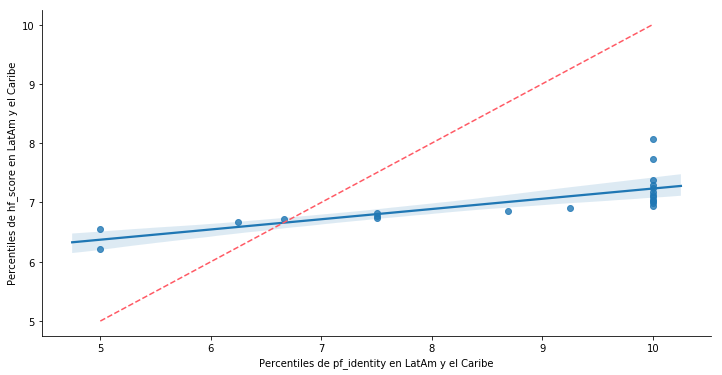

In [80]:
plt.figure(figsize=(12,6))
sns.regplot(x=qn_pf_identity_latam_cleaned, y=qn_hf_score_latam_cleaned)
plt.xlabel('Percentiles de pf_identity en LatAm y el Caribe')
plt.ylabel('Percentiles de hf_score en LatAm y el Caribe')

# Graficamos la linea de la identidad.
x = np.linspace(np.min((qn_pf_identity_latam_cleaned.min(),qn_hf_score_latam_cleaned.min())), np.max((qn_pf_identity_latam_cleaned.max(),qn_hf_score_latam_cleaned.max())))
plt.plot(x,x, color=RED, ls="--")

sns.despine()

**3.3 Interpretación (*pf_identity* vs *hf_score*):**

Vemos que ambas distribuciones están relacionadas linealmente, dado que los puntos del gráfico QQ estan ligeramente alineados, aunque no en la dirección de la identidad. En este caso, como la tendencia del gráfico está por debajo de la identidad, la distribución del eje x (*pf_identity*) es más dispersa que la de *hf_score*

Proponemos a continuación comparar a cada una de las distribuciones de las variables bajo investigación contra una distribución normal ideal:

In [86]:
loc, scale = norm.fit(qn_pf_identity_latam_cleaned)
norm_dist = norm(loc, scale)
qn_norm_dist_len_pf_identity = np.percentile(norm_dist.rvs(len(qn_pf_identity_latam_cleaned)), percs)

**Comparación con grafico QQ entre distribución normal y *pf_identity*:**

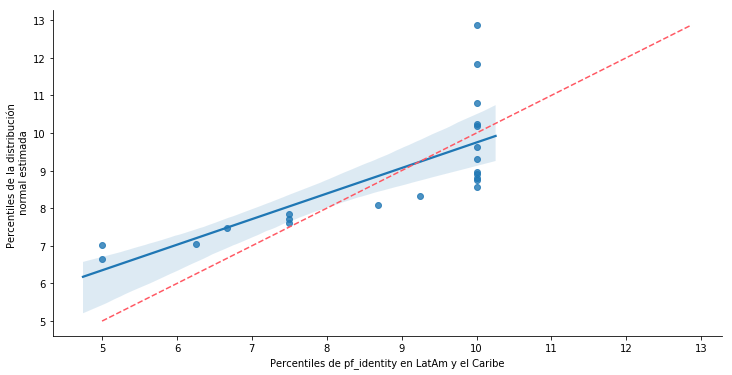

In [88]:
plt.figure(figsize=(12,6))
sns.regplot(x=qn_pf_identity_latam_cleaned, y=qn_norm_dist_len_pf_identity)
plt.xlabel('Percentiles de pf_identity en LatAm y el Caribe')
plt.ylabel('Percentiles de la distribución \n normal estimada')

# Graficamos la linea de la identidad.
x = n.linspace(n.min((qn_pf_identity_latam_cleaned.min(),qn_norm_dist_len_pf_identity.min())), n.max((qn_pf_identity_latam_cleaned.max(),qn_norm_dist_len_pf_identity.max())))
plt.plot(x,x, color=RED, ls="--")

sns.despine()

In [89]:
loc, scale = norm.fit(qn_hf_score_latam_cleaned)
norm_dist = norm(loc, scale)
qn_norm_dist_len_hf_score = np.percentile(norm_dist.rvs(len(qn_hf_score_latam_cleaned)), percs)

**Comparación con grafico QQ entre distribución normal y *hf_score***

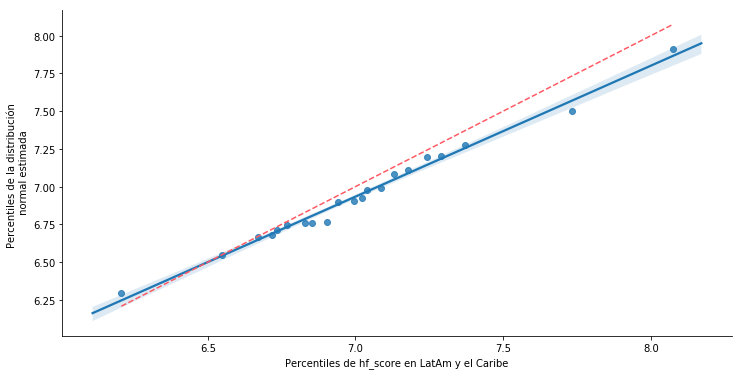

In [90]:
plt.figure(figsize=(12,6))
sns.regplot(x=qn_hf_score_latam_cleaned, y=qn_norm_dist_len_hf_score)
plt.xlabel('Percentiles de hf_score en LatAm y el Caribe')
plt.ylabel('Percentiles de la distribución \n normal estimada')

# Graficamos la linea de la identidad.
x = np.linspace(np.min((qn_hf_score_latam_cleaned.min(),qn_norm_dist_len_hf_score.min())), np.max((qn_hf_score_latam_cleaned.max(),qn_norm_dist_len_hf_score.max())))
plt.plot(x,x, color=RED, ls="--")

sns.despine()

**3.3 Interpretación (vs normal):**

Como podemos ver, en el caso de *pf_identity* vemos que hay un cierta tendencia a una normal, pero hay una gran acumulación de datos en el valor 10.

Contrariamente, *hf_score* vemos que comparando contra una normal sus distribuciones se asemejan mucho mas.

### 4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [91]:
print("pf_identity_skew =", pf_identity_latam_cleaned.skew())
print("pf_identity_kurtosis =", pf_identity_latam_cleaned.kurtosis())

pf_identity_skew = -1.0546753270192766
pf_identity_kurtosis = -0.2754545895278522


In [92]:
print("hf_score_skew =", hf_score_latam_cleaned_wo_outliers.skew())
print("hf_score_kurtosis =", hf_score_latam_cleaned_wo_outliers.kurtosis())

hf_score_skew = 0.7540659843787029
hf_score_kurtosis = 1.1952226799663976


**3.4 Interpretación:**

**Skew**

Como vemos, el valor de Skew es negativo en el caso de *pf_identity*, denotando una asimetria, es decir, la cola de la distribución se alarga para valores inferiores a la media. Esto se ve claramente en todos los gráficos realizados para esta variable. Por otro lado, para *hf_score* el valor de skew es mas cercano a 0 por lo que no es tan asimétrica como la variable anterior, sin embargo, dado su valor positivo, indica que la cola de distribución posee un leve sesgo  hacia valores superiores a la media.


**Kurtosis**

En lo que respecta a Kurtosis, vemos por un lado en el valor de pf_identity_kurtosis un numero pequeño,  implicando un cierto achatamiento de la campana de Gauss sobre la media. En el caso del valor de hf_score_kurtosis, vemos una mayor concentración de valores sobre la media, lo cual se corresponde son su alto valor de Kurtosis en comparación a pf_identity_kurtosis.


**vs Grafico QQ**

Relacionando esto con el gráfico QQ vemos en el caso de los valores de skew como la simetría esta relacionado con la distribución de los puntos sobre el plano:
- En el caso de *hf_score* se ve una distribución más uniforme de los puntos, lo cual es afín con el pequeño valor de skew. 
- Para *pf_identity* esta relacion ente la distribución de los puntos y el valor de skew también se da, esta vez no por la uniformidad en la ubicación de los puntos, sino por la falta de ella, relacionándose así con el valor mas alejado de 0 de skew en esta ocasión.
    Con respecto la kurtosis podemos decir que sus valor se relación dado la mayor o menor cercanía de la ubicación de los puntos con respecto a la identidad.

El gráfico QQ brinda entonces información que se corresponde con los valores de skew y kurtosis, pero además presenta visualmente al lector una forma mas intuitiva de comprender dichos datos. También mediante la comparación de las distribuciones de *pf_identity* y *hf_score* entre ellas, brinda una gráfico que permite sacar conclusiones que de otra manera con los valores numéricos de skew y kurtosis no hubiera sido posible llegar.


_________________________________________________
_________________________________________________

## 4. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es categórica, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


Empiezo con la limpieza que hice de los datos. Ver si hace falta de acuerdo a hecho en los puntos anteriores

In [223]:
brief_cols = [
    'year', 'ISO_code', 'countries', 'region',
    'pf_identity',
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [224]:
cl_dataset = dataset[important_cols]

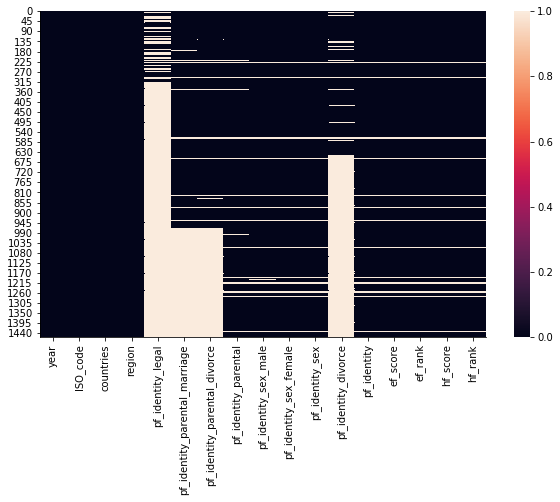

In [225]:
plt.figure(figsize=(10,6))
sns.heatmap(cl_dataset.isna())
sns.despine()

Descardo algunas columnas debido a que la maoyria de sus datos son nan

In [226]:
drop_cols = ['pf_identity_legal', 'pf_identity_parental_marriage', 
             'pf_identity_parental_divorce', 'pf_identity_divorce',
            'pf_identity_parental']
cl_dataset.drop(drop_cols, axis=1, inplace=True)

/home/franco/anaconda3/envs/diplodatos/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


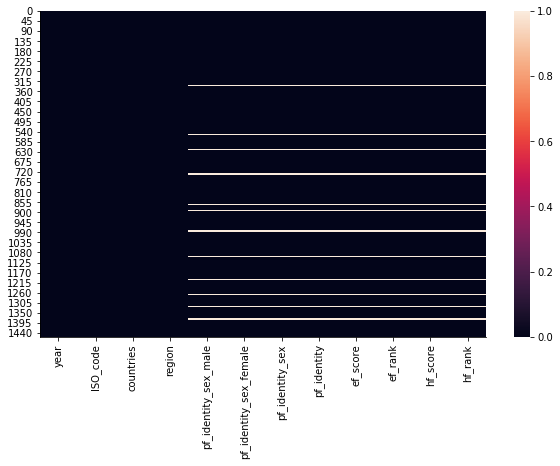

In [227]:
plt.figure(figsize=(10,6))
sns.heatmap(cl_dataset.isna())
sns.despine()

In [228]:
print(cl_dataset.shape)
print(cl_dataset.dropna().shape)

(1458, 12)
(1375, 12)


Solamente una pequeña parte de los datos se pierde si descartamos los datos nan

In [229]:
cl_dataset.dropna(inplace=True)

/home/franco/anaconda3/envs/diplodatos/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [230]:
latins_countries = cl_dataset[cl_dataset["region"] == "Latin America & the Caribbean"]

Por pruebas en otro notebook se que Venezuela es un outlier en latinoamerica. Lo saco del dataset

In [231]:
latin_mask = ((latins_countries["countries"] != "Venezuela"))
cl_latin = latins_countries[latin_mask]


In [232]:
brief_cl_ds    = cl_dataset[brief_cols]
brief_cl_latin = cl_latin[brief_cols]

<Figure size 1152x720 with 0 Axes>

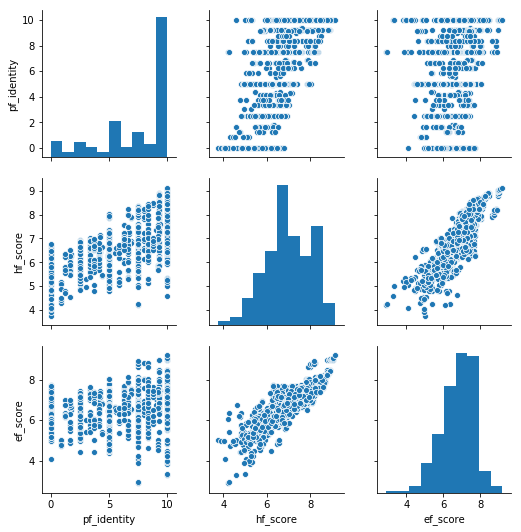

In [233]:
plt.figure(figsize=(16,10))
sns.pairplot(brief_cl_ds[["pf_identity", "hf_score", "ef_score","region"]])


<Figure size 1152x720 with 0 Axes>

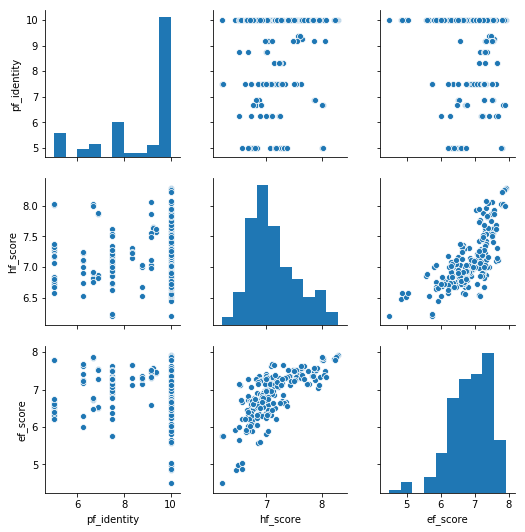

In [234]:
plt.figure(figsize=(16,10))
sns.pairplot(brief_cl_latin[["pf_identity", "hf_score", "ef_score"]])


PAra poder ver la relación con más detalle, hago nuevos gŕaficos usando una regresión lineal para fitear los datos

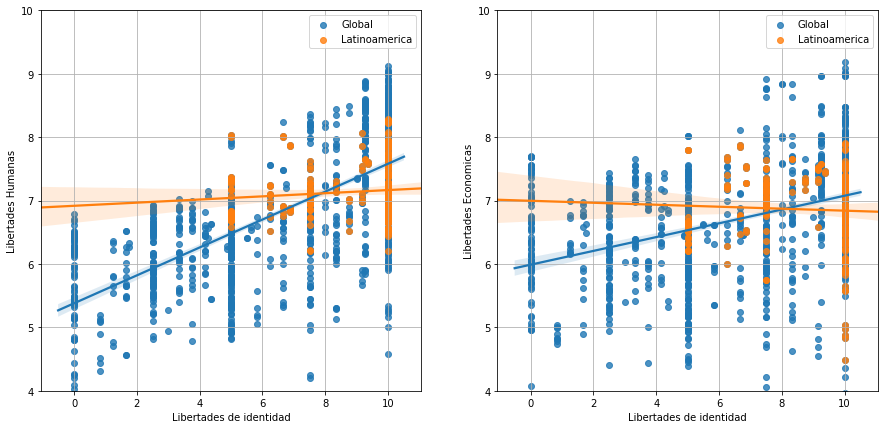

In [235]:
plt.figure(figsize=(15,7))
for idx, var in enumerate(["hf_score", "ef_score"]):
    plt.subplot(1, 2, idx+1)
    sns.regplot(x="pf_identity", y=var, 
                data=brief_cl_ds, 
                label="Global")
    sns.regplot(x="pf_identity", y=var, data=brief_cl_latin, label="Latinoamerica")
    plt.grid()
    plt.ylim([4,10])
    plt.xlabel("Libertades de identidad")
    if var == "hf_score":
        plt.ylabel("Libertades Humanas")
    else:
        plt.ylabel("Libertades Economicas")
    plt.legend(loc=0)

A partir de estos gráficos, necesitamos hacer 2 analisis diferentes, uno para lo que pasa globalmente y otro para lo que pasa en Latinoamerica.
Se puede ver que mundialmente las libertades de identidad  estan bien correlacionadas positivamente con el indice de libertad humana y las libertades ecónomicas. Las pendientes de las rectas obtenidas en la regresión lineal, indican que la correlación de las libertades de identidad es mayor con el indice de libertades humanas. A priori uno esperaría un resultado este ya que la libertad de identidad es un indicador más que esta más relacionado a lo humano que a lo ecónomico.

Algo diferente ocurre en latinoamerica, donde las variables estan correlacionadas debilmente e incluso existe una correlación negativa entre la libertad de identidad y las libertades económicas. Esta correlación negativa puede deberse a que en latinoamerica la variable libertades de identidad es mayor o igual 5. Vemos como es la correlación de las variables en el mundo cuando miramos solo en ese rango


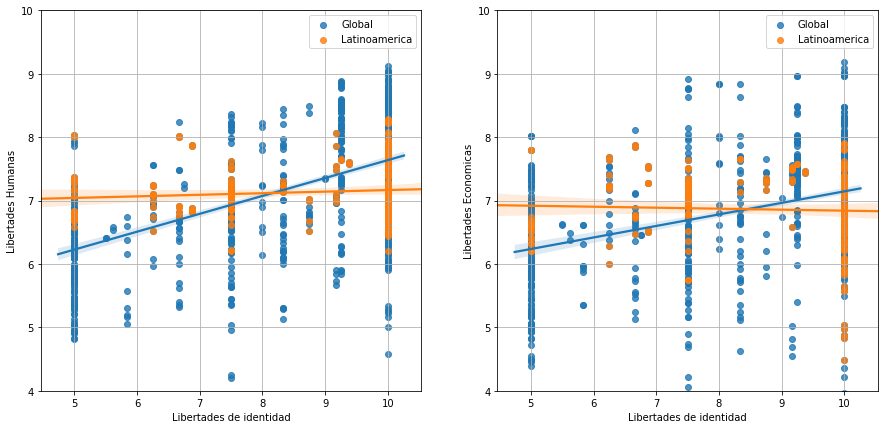

In [236]:
plt.figure(figsize=(15,7))
for idx, var in enumerate(["hf_score", "ef_score"]):
    plt.subplot(1, 2, idx+1)
    sns.regplot(x="pf_identity", y=var, 
                data=brief_cl_ds[brief_cl_ds["pf_identity"]>=5], 
                label="Global")
    sns.regplot(x="pf_identity", y=var, data=brief_cl_latin, label="Latinoamerica")
    plt.grid()
    plt.ylim([4,10])
    plt.xlabel("Libertades de identidad")
    if var == "hf_score":
        plt.ylabel("Libertades Humanas")
    else:
        plt.ylabel("Libertades Economicas")
    plt.legend(loc=0)

Podemos ver que la tendencia se mantiene. Antes de establecer una colcusión vamos a calcular el valor númerico de cada correlación para corroborar lo que vemos gráficamente

Como las variables NO estan distribuidas normalmente, no es posible utilizar la correlación con el metodo de Spearman. Lo vamos a analizar con el metodo de Kendall que es apto para variables ordinales, de intervalo o de razon.

Para el mundo es

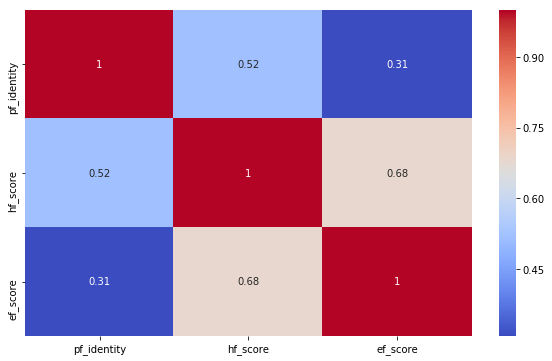

In [237]:
plt.figure(figsize=(10,6))
sns.heatmap(brief_cl_ds[["pf_identity", "hf_score", "ef_score"]].corr(method="kendall"), 
            annot=True, cmap="coolwarm")

Mientras que en latinoamerica tenemos

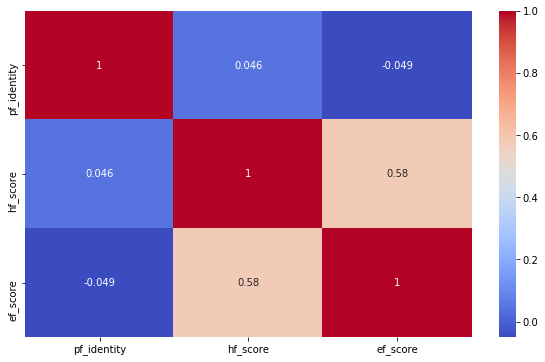

In [238]:
plt.figure(figsize=(10,6))
sns.heatmap(brief_cl_latin[["pf_identity", "hf_score", "ef_score"]].corr(method="kendall"), 
            annot=True, cmap="coolwarm")

De esta forma corroboramos lo que vimos gráficamente, lo que se observa a nivel global es diferente de lo que se ve en latinoamerica en cuanto a las relaciones entre las libertades de identidad con las libertades humanas y economicas. Las mismas son mucho más dependientes a nivel mundial que en latinoamerica

Finalmente, como la region es una variable categórica no podemos establecer una correlación numérica entre ella y las libertades humanas y económicas. Vamos a usar boxplots para ver como varian estas variables en las diferentes regiones

In [246]:
brief_cl_ds["region"].unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

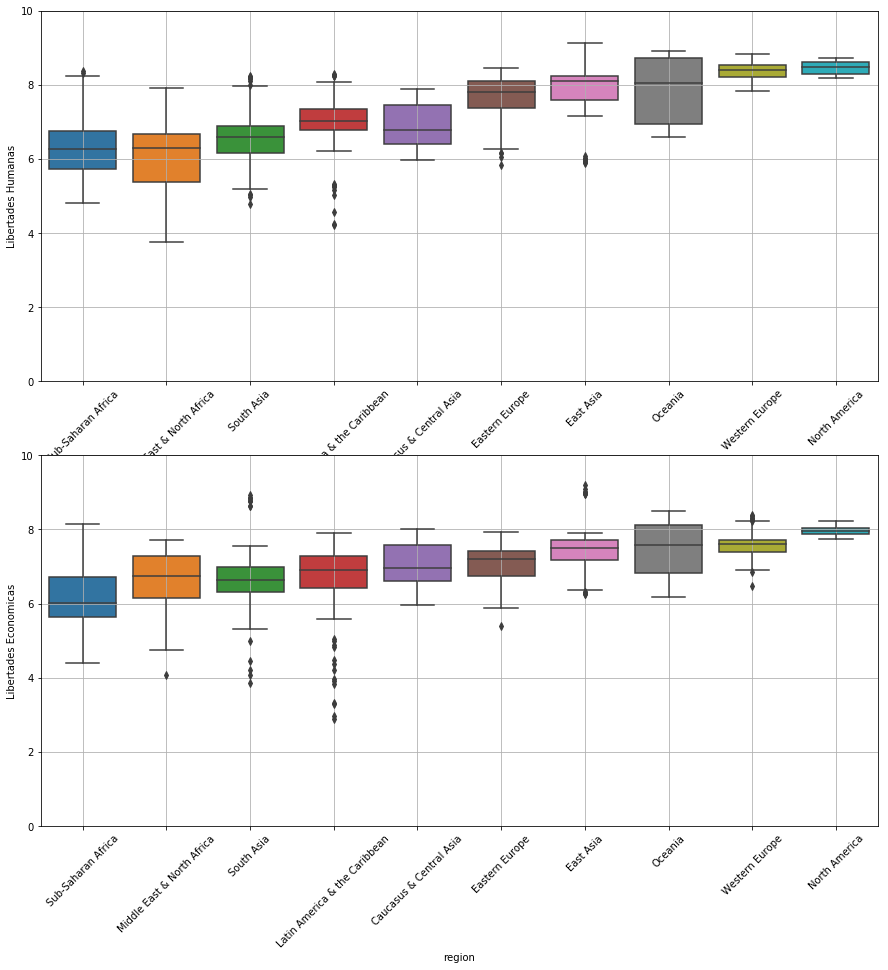

In [251]:
plt.figure(figsize=(15,15))
for idx, var in enumerate(["hf_score", "ef_score"]):
    plt.subplot(2, 1, idx+1)
    sns.boxplot(x="region", y=var, data=brief_cl_ds, order=poorest_to_reach_order)
    plt.xticks(rotation=45)
    plt.ylim([0,10])
    plt.grid()
    if var == "hf_score":
        plt.ylabel("Libertades Humanas")
    else:
        plt.ylabel("Libertades Economicas")



El grafico asi como está no nos dice mucho ya que las regiones no estan ordenadas de acuerdo a ningún patrón. Veamos que pasa cuando ordenamos aproximadamente las regiones de más pobres a más ricas, o de tercer mundistas a primer mundistas

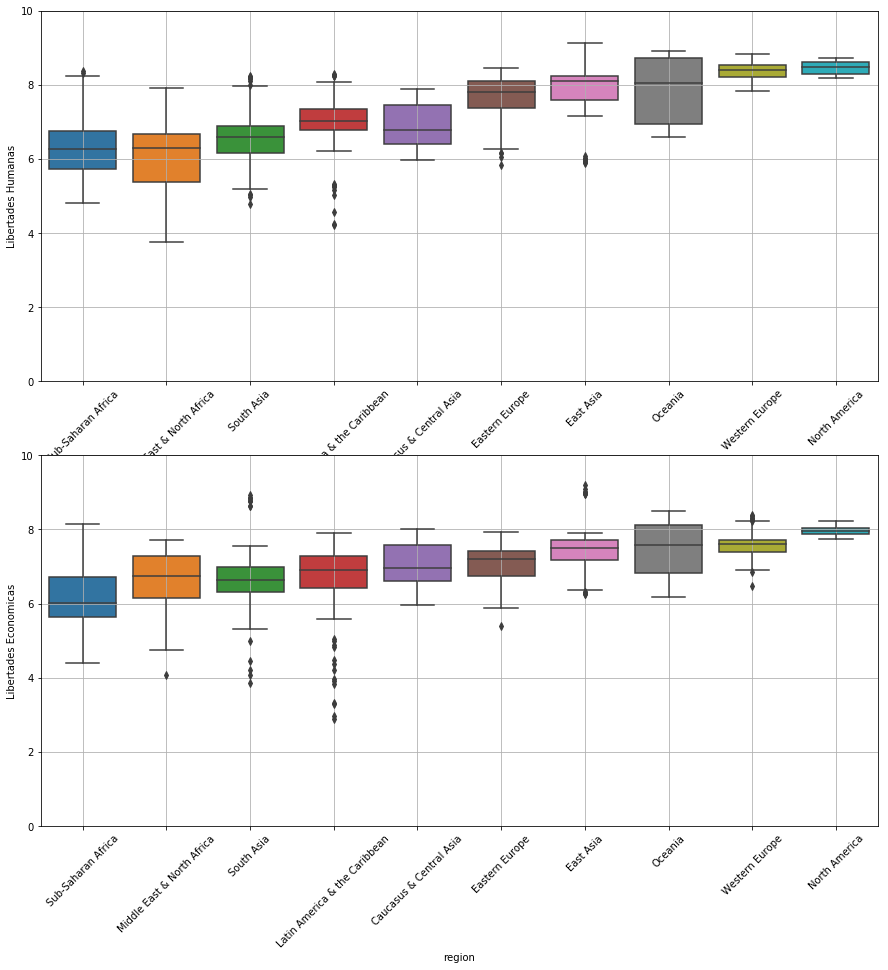

In [255]:
poorest_to_reach_order = ['Sub-Saharan Africa','Middle East & North Africa',                          'South Asia',
                          'Latin America & the Caribbean','Caucasus & Central Asia',
                          'Eastern Europe', 'East Asia','Oceania', 'Western Europe',
                          'North America']
plt.figure(figsize=(15,15))
for idx, var in enumerate(["hf_score", "ef_score"]):
    plt.subplot(2, 1, idx+1)
    sns.boxplot(x="region", y=var, data=brief_cl_ds, order=poorest_to_reach_order,
               #hue="year"
               )
    plt.xticks(rotation=45)
    plt.ylim([0,10])
    plt.grid()
    if var == "hf_score":
        plt.ylabel("Libertades Humanas")
    else:
        plt.ylabel("Libertades Economicas")


Así, podemos destacar que los países o regiones con economias más fuertes o prosperas muestran más libertades económicas y humanas